# Phys555 Assignment 1 Question 3

Q3- Add noise to the MNIST data set (explore the web to find a good example). Compare the explained variance ratio vs. the principle components (plots) and find the best first components so that the added noise is removed/cancelled. Change the amplitude of the noise and have a discussion in the notebook. 

https://debuggercafe.com/adding-noise-to-image-data-for-deep-learning-data-augmentation/

In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

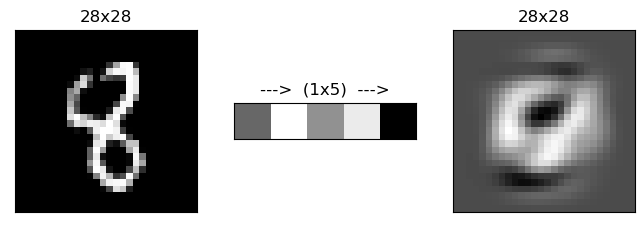

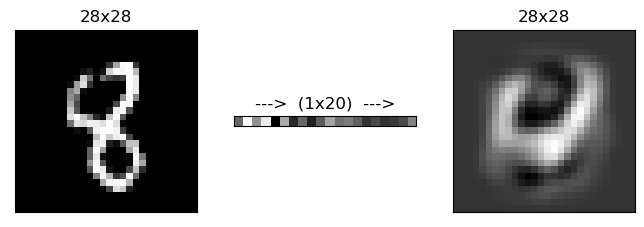

In [ ]:
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr = inp_tr/255.
inp_va = inp_va/255.
inp_tr=np.reshape(inp_tr,(-1,28*28))
inp_va=np.reshape(inp_va,(-1,28*28))

n_pic = np.random.choice(np.arange(len(inp_va)))

for kc in [5,20, 50, 100, 400]:
    n_components=kc
    pca=PCA(n_components=n_components)

    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)

    sx= int(np.sqrt(n_components))
    sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-constract the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])

    plt.show()